In [4]:
import numpy as np
import pandas as pd
from nsepy import get_history
from datetime import date
import yfinance as yf
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [5]:
ticker = "BSOFT.NS "
start_date = "2022-01-01"
end_date = "2023-09-08"

df=yf.download(ticker, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [6]:
print(df.info())
print(df.describe())
df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 418 entries, 2022-01-03 to 2023-09-07
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       418 non-null    float64
 1   High       418 non-null    float64
 2   Low        418 non-null    float64
 3   Close      418 non-null    float64
 4   Adj Close  418 non-null    float64
 5   Volume     418 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 22.9 KB
None
             Open        High         Low       Close   Adj Close  \
count  418.000000  418.000000  418.000000  418.000000  418.000000   
mean   355.775120  361.422009  349.334210  354.994258  351.072829   
std     77.023061   78.569188   75.046489   76.632093   74.742901   
min    253.000000  256.700012  250.250000  251.750000  250.358734   
25%    292.824989  295.687492  287.887505  291.850006  290.168465   
50%    337.000000  342.000000  333.000000  336.000000  332.999512   
75%    408.199989 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,547.599976,570.950012,546.650024,566.950012,555.828613,6117415
2022-01-04,570.000000,572.400024,555.549988,559.599976,548.622803,2553963
2022-01-05,558.299988,558.299988,547.000000,550.950012,540.142517,1867208
2022-01-06,542.450012,564.700012,537.200012,559.349976,548.377747,3262562
2022-01-07,568.000000,582.400024,561.549988,577.299988,565.975586,9110065
...,...,...,...,...,...,...
2023-09-01,512.900024,530.900024,508.000000,528.349976,528.349976,3248231
2023-09-04,529.950012,535.549988,516.599976,518.799988,518.799988,2455401
2023-09-05,520.799988,533.500000,518.900024,524.799988,524.799988,2255475


In [7]:
rolling_avg = df['Close'].rolling(window=30).mean()
corr_coeff = df['Close'].corr(df['Volume']).mean()

In [8]:
# Moving Average
print(rolling_avg.tail(14))

Date
2023-08-21    412.923332
2023-08-22    416.934998
2023-08-23    420.618331
2023-08-24    424.804998
2023-08-25    428.893331
2023-08-28    432.404997
2023-08-29    436.063330
2023-08-30    439.434998
2023-08-31    443.308331
2023-09-01    447.838330
2023-09-04    452.278329
2023-09-05    456.993329
2023-09-06    461.681663
2023-09-07    466.133329
Name: Close, dtype: float64


In [9]:
# Correlation Coefficient 
print(corr_coeff)

0.17968147607950435


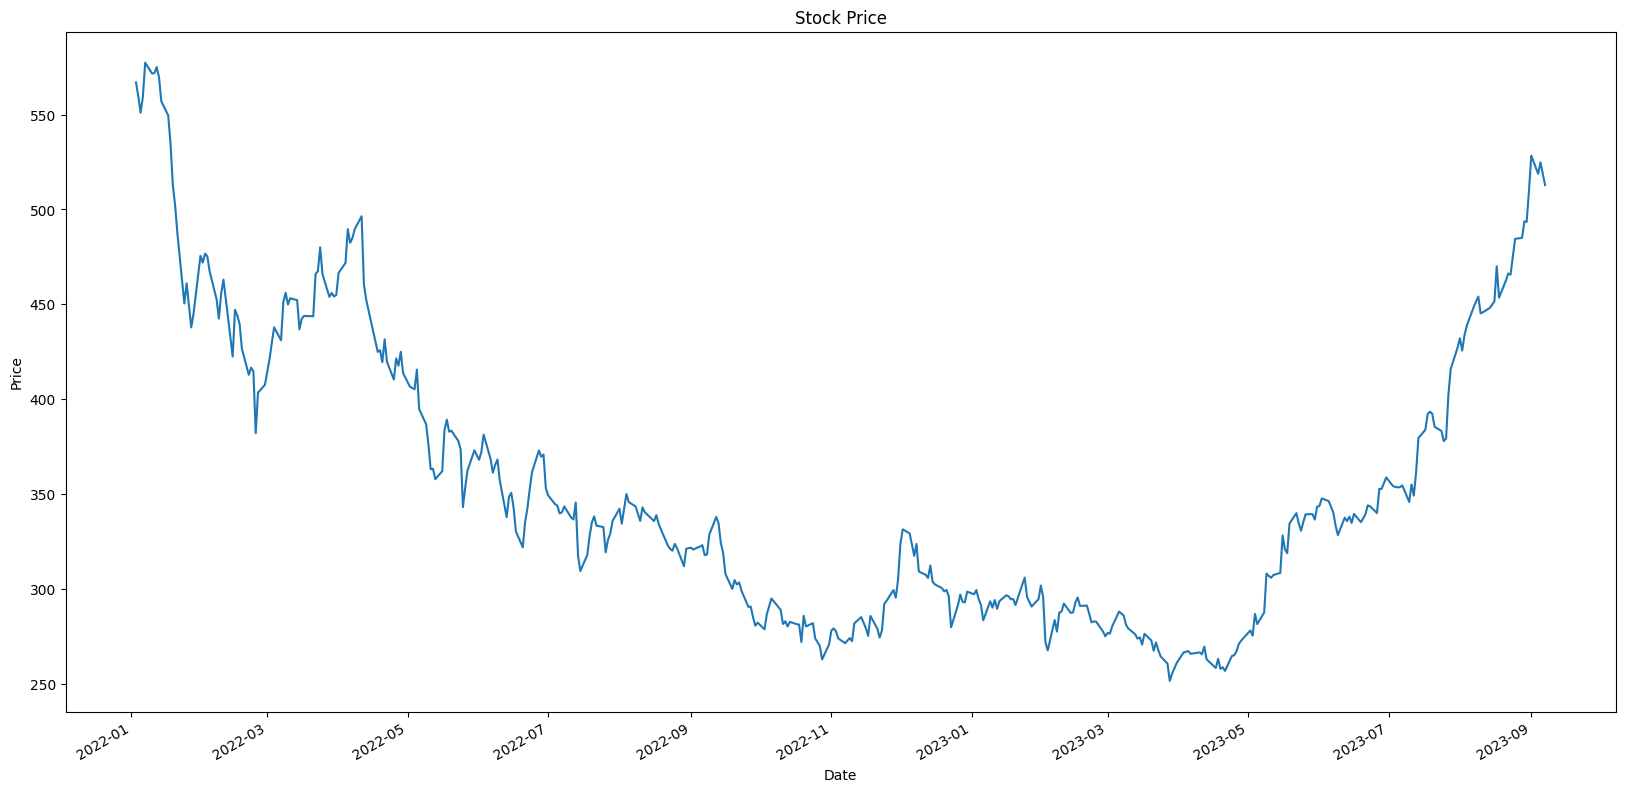

In [10]:
# Stock Price over time
df['Close'].plot(figsize=(20,10), title='Stock Price')
plt.ylabel("Price")
plt.show()

In [11]:
print(df.Close)

Date
2022-01-03    566.950012
2022-01-04    559.599976
2022-01-05    550.950012
2022-01-06    559.349976
2022-01-07    577.299988
                 ...    
2023-09-01    528.349976
2023-09-04    518.799988
2023-09-05    524.799988
2023-09-06    518.700012
2023-09-07    512.849976
Name: Close, Length: 418, dtype: float64


In [12]:
# Daily return and Cumulative Return
df["Daily Return"] = df["Close"].pct_change()
df["Cumulative Return"] = (1 + df["Daily Return"]).cumprod()
print(df[["Daily Return","Cumulative Return"]].tail(14))

            Daily Return  Cumulative Return
Date                                       
2023-08-21      0.019954           0.815945
2023-08-22      0.007998           0.822471
2023-08-23     -0.001394           0.821325
2023-08-24      0.019865           0.837640
2023-08-25      0.020320           0.854661
2023-08-28      0.001032           0.855543
2023-08-29      0.017833           0.870800
2023-08-30     -0.000506           0.870359
2023-08-31      0.032931           0.899021
2023-09-01      0.036590           0.931916
2023-09-04     -0.018075           0.915072
2023-09-05      0.011565           0.925655
2023-09-06     -0.011623           0.914895
2023-09-07     -0.011278           0.904577


In [13]:
# Momentum
period = 10
df["momentum"] = df["Close"].pct_change(period) * 50

In [14]:
print(df[["momentum"]].tail(14))

            momentum
Date                
2023-08-21  2.711944
2023-08-22  1.972802
2023-08-23  1.561290
2023-08-24  2.284488
2023-08-25  4.407141
2023-08-28  4.396095
2023-08-29  5.082006
2023-08-30  4.639578
2023-08-31  4.211870
2023-09-01  8.246058
2023-09-04  6.074360
2023-09-05  6.272786
2023-09-06  5.696340
2023-09-07  3.995576


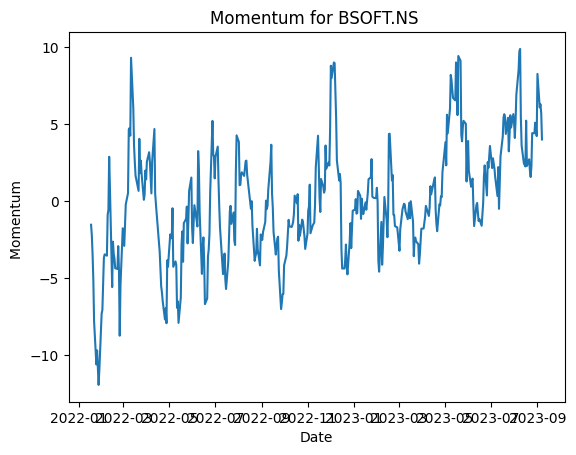

In [15]:
# Momentun Graph
df["momentum"] = df["Close"].pct_change(period) * 50
plt.plot(df.index, df["momentum"])
plt.title(f"Momentum for {ticker}")
plt.xlabel("Date")
plt.ylabel("Momentum ")
plt.show()

In [16]:
# moving average of the closing prices over the last 20 days
df["SMA20"] = df["Close"].rolling(window=20).mean()

# moving average of the closing prices over the last 50 days
df["SMA50"] = df["Close"].rolling(window=50).mean()
df['Shares']= [1 if df.loc[ei,'SMA20']>df.loc[ei,'SMA50'] else 0 for ei in df.index]


# 14-day relative strength index (RSI)
delta = df["Close"].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
df["RSI14"] = 100 - (100 / (1 + rs))
n = 14
roc = df['Close'].pct_change(n)
roc_osc = 100 * (roc / abs(roc)).rolling(n).mean()



# display the results
print(df[["Close", "SMA20", "SMA50", "RSI14",]].tail(14))
print(roc_osc.tail(10))


                 Close       SMA20       SMA50      RSI14
Date                                                     
2023-08-21  462.600006  432.394997  385.558000  67.844523
2023-08-22  466.299988  436.542496  388.314000  67.450175
2023-08-23  465.649994  440.922496  390.872999  71.700149
2023-08-24  474.899994  445.702496  393.652999  72.049349
2023-08-25  484.549988  449.819995  396.578999  73.377610
2023-08-28  485.049988  453.277495  399.580999  70.581578
2023-08-29  493.700012  456.599995  402.660999  72.360741
2023-08-30  493.450012  459.664996  405.822999  71.381934
2023-08-31  509.700012  463.864996  409.270999  82.426985
2023-09-01  528.349976  468.592496  413.046999  85.136275
2023-09-04  518.799988  472.592496  416.538998  78.339349
2023-09-05  524.799988  476.402495  420.160998  78.781925
2023-09-06  518.700012  479.759996  423.731998  71.167258
2023-09-07  512.849976  482.694995  426.931998  78.482229
Date
2023-08-25    100.0
2023-08-28    100.0
2023-08-29    100.0
2023-08

In [17]:
# Stochastic Oscillator
n = 14
lowest_low = df['Low'].rolling(n).min()
highest_high = df['High'].rolling(n).max()
k = 100 * (df['Close'] - lowest_low) / (highest_high - lowest_low)
d = k.rolling(window=3).mean()

df['%K'] = k
df['%D'] = d
print(df[['%K','%D']].tail(14))


                   %K         %D
Date                            
2023-08-21  82.462700  82.232698
2023-08-22  89.365650  79.568152
2023-08-23  87.717593  86.515314
2023-08-24  90.700215  89.261153
2023-08-25  93.867444  90.761751
2023-08-28  93.172644  92.580101
2023-08-29  92.288389  93.109492
2023-08-30  91.869277  92.443437
2023-08-31  96.996612  93.718093
2023-09-01  97.235720  95.367203
2023-09-04  81.242999  91.825110
2023-09-05  87.686138  88.721619
2023-09-06  80.698765  83.209301
2023-09-07  72.830622  80.405175


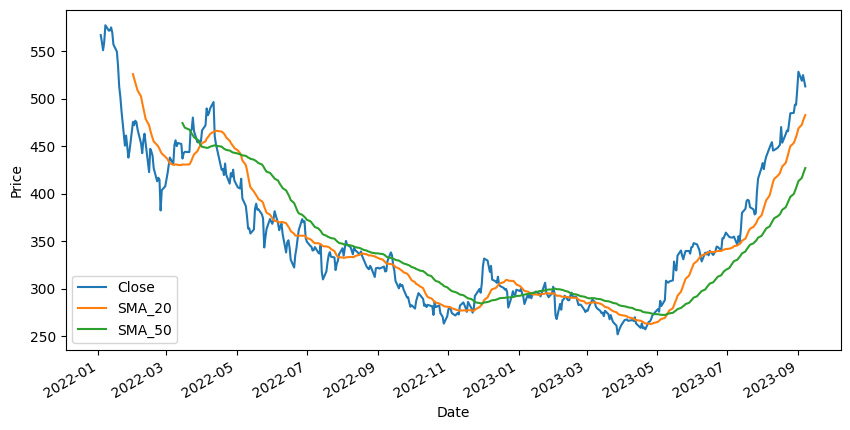

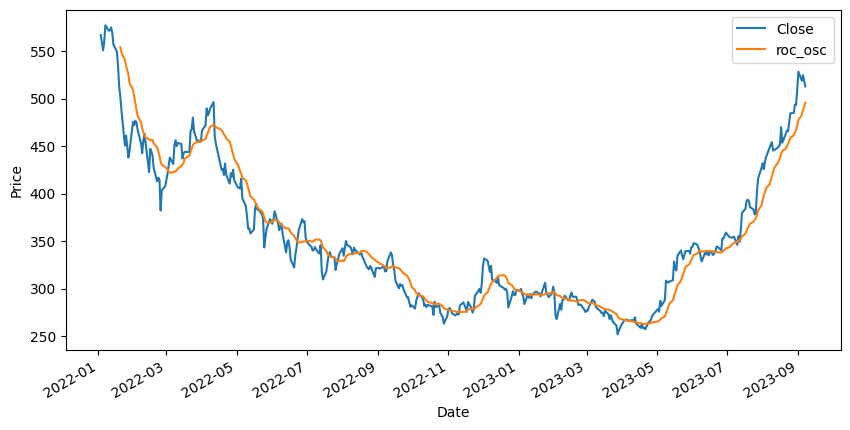

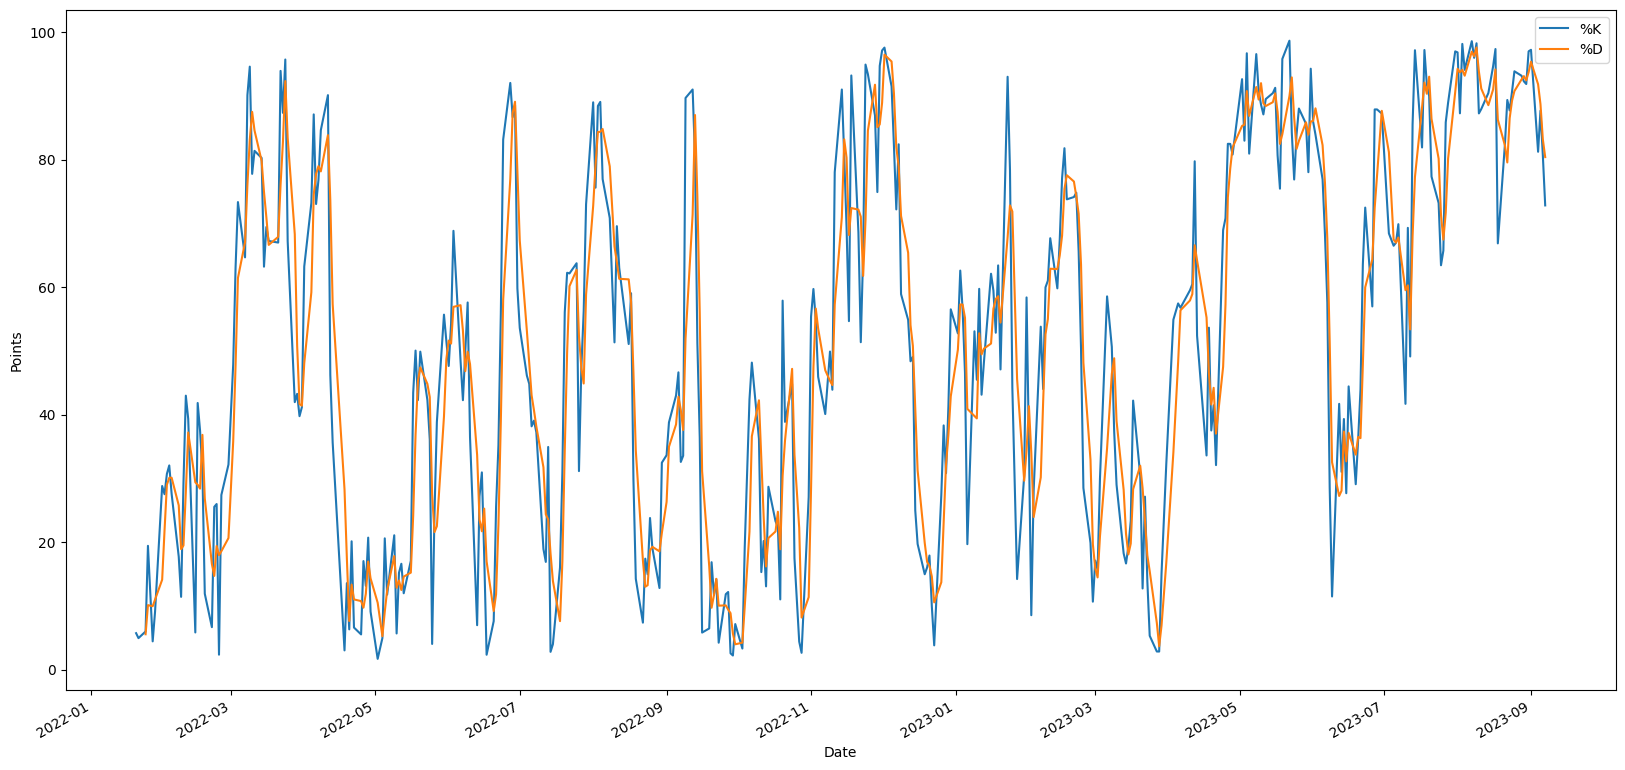

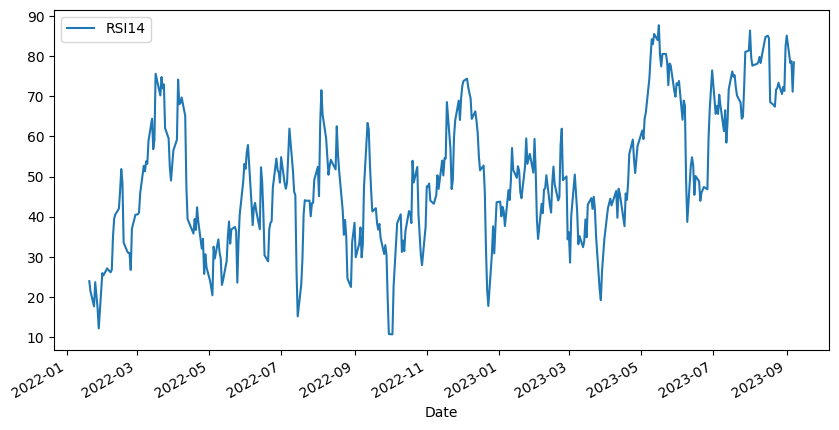

In [18]:
# SMA20, SMA50, RSI Graph
df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['RSI_14'] = df['Close'].rolling(window=14).mean()
df['roc_osc'] = df['Close'].rolling(window=14).mean()
df[['Close', 'SMA_20', 'SMA_50']].plot(figsize=(10,5))
plt.ylabel("Price")
df[['Close','roc_osc']].plot(figsize=(10,5))
plt.ylabel("Price")
df[['%K', '%D']].plot(figsize=(20,10))
plt.ylabel("Points")
df[['RSI14']].plot(figsize=(10,5))
plt.show()

In [19]:
df['Shares']= [1 if df.loc[ei,'SMA_20']>df.loc[ei,'SMA_50'] else 0 for ei in df.index]
df['Shares'].tail

<bound method NDFrame.tail of Date
2022-01-03    0
2022-01-04    0
2022-01-05    0
2022-01-06    0
2022-01-07    0
             ..
2023-09-01    1
2023-09-04    1
2023-09-05    1
2023-09-06    1
2023-09-07    1
Name: Shares, Length: 418, dtype: int64>

Text(0.5, 0, 'Years')

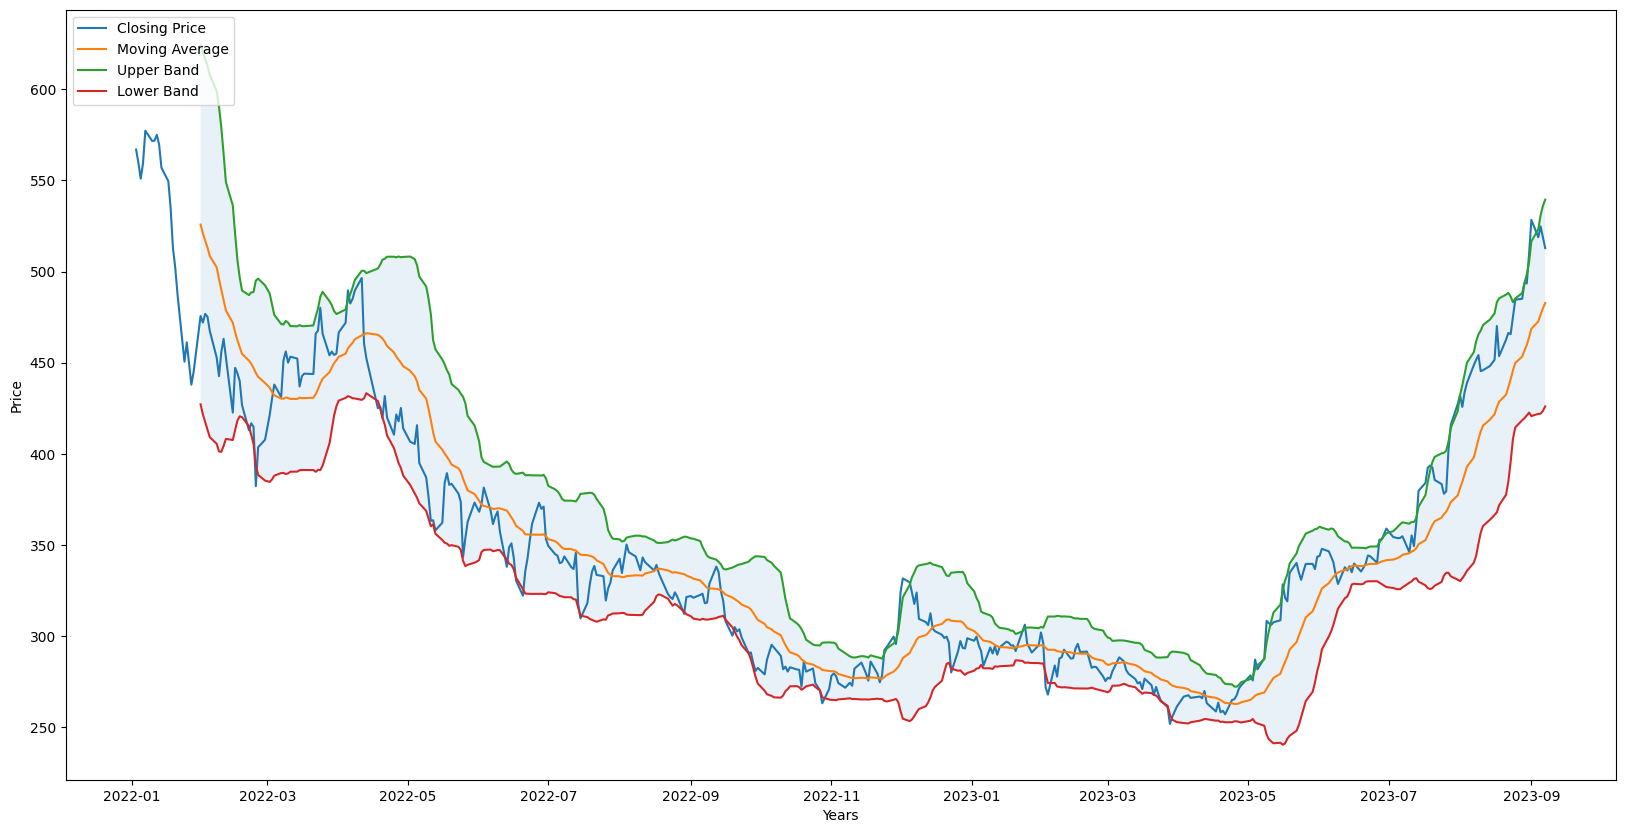

In [20]:
# Bollinger Bands
n = 20 
std = 2 
ma = df['Close'].rolling(n).mean()
upper_band = ma + std * df['Close'].rolling(n).std()
lower_band = ma - std * df['Close'].rolling(n).std()

df['MA'] = ma
df['Upper Band'] = upper_band
df['Lower Band'] = lower_band

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(df['Close'], label='Closing Price')
ax.plot(df['MA'], label='Moving Average')
ax.plot(df['Upper Band'], label='Upper Band')
ax.plot(df['Lower Band'], label='Lower Band')
ax.fill_between(df.index, lower_band, upper_band, alpha=0.1)
ax.legend(loc='upper left')
plt.ylabel("Price")
plt.xlabel("Years")

In [31]:
# Mean, Median,Standar Deviation
df['returns'] = df['Adj Close'].pct_change()

std_dev = df['returns'].std()
mean_price = df['Close'].mean()
median_price = df['Close'].median()


print('Mean:', mean_price)
print('Median:', median_price)
print('Standard Deviation:', std_dev)

Mean: 354.99425802276465
Median: 336.0
Standard Deviation: 0.02407231944708248


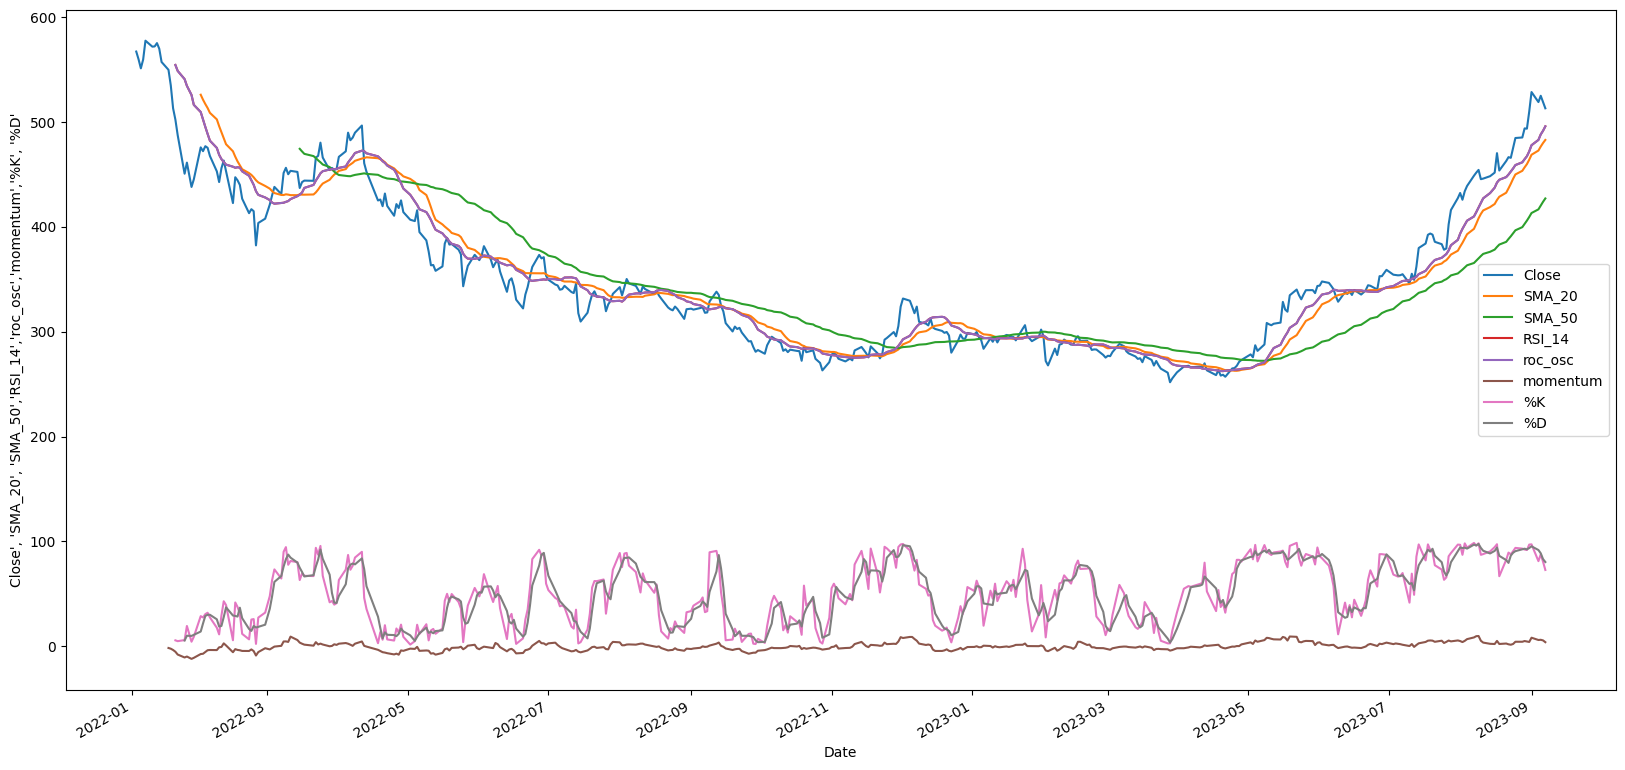

In [32]:
df[['Close', 'SMA_20', 'SMA_50','RSI_14','roc_osc','momentum','%K', '%D']].plot(figsize=(20,10))
plt.xlabel("Date")
plt.ylabel("Close', 'SMA_20', 'SMA_50','RSI_14','roc_osc','momentum','%K', '%D'")
plt.show()

In [33]:
df.tail(20)

,Open,High,Low,Close,Adj Close,Volume,Daily Return,Cumulative Return,momentum,SMA20,...,%K,%D,SMA_20,SMA_50,RSI_14,roc_osc,MA,Upper Band,Lower Band,returns
Date,,,,,,,,,,,,,,,,,,,,,
2023-08-10,452.700012,452.700012,444.600006,445.299988,445.299988,1661347,-0.019487,0.785431,5.358028,412.179999,...,87.259164,93.833789,412.179999,372.038000,422.578568,422.578568,412.179999,467.624496,356.735502,-0.019487
2023-08-11,446.000000,451.149994,440.700012,445.850006,445.850006,1486040,0.001235,0.786401,3.600627,415.487498,...,87.942842,91.153934,415.487498,374.078000,427.042853,427.042853,415.487498,470.665425,360.309572,0.001235
2023-08-14,444.850006,448.899994,438.649994,448.149994,448.149994,1172380,0.005159,0.790458,2.445874,418.697498,...,90.457776,88.553260,418.697498,376.085001,432.049997,432.049997,418.697498,473.619472,363.775523,0.005159
2023-08-16,450.000000,454.500000,446.250000,451.549988,451.549988,2240944,0.007587,0.796455,2.244590,421.659998,...,94.623655,91.008091,421.659998,378.187000,437.210711,437.210711,421.659998,476.977151,366.342845,0.007587
2023-08-17,452.799988,472.000000,452.000000,470.100006,470.100006,5942124,0.041081,0.829174,5.214939,425.489998,...,97.359286,94.146906,425.489998,380.718000,442.060710,442.060710,425.489998,483.155113,367.824883,0.041081
2023-08-18,470.100006,470.149994,448.250000,453.549988,453.549988,2847473,-0.035205,0.799982,2.276395,428.544997,...,66.876107,86.286350,428.544997,382.980000,444.749996,444.749996,428.544997,485.306869,371.783124,-0.035205
2023-08-21,455.000000,463.799988,452.000000,462.600006,462.600006,1350315,0.019954,0.815945,2.711944,432.394997,...,82.462700,82.232698,432.394997,385.558000,447.274996,447.274996,432.394997,487.307548,377.482445,0.019954
2023-08-22,464.200012,468.950012,462.399994,466.299988,466.299988,1984953,0.007998,0.822471,1.972802,436.542496,...,89.365650,79.568152,436.542496,388.314000,449.714281,449.714281,436.542496,488.297377,384.787614,0.007998
2023-08-23,468.399994,471.799988,464.149994,465.649994,465.649994,966232,-0.001394,0.821325,1.561290,440.922496,...,87.717593,86.515314,440.922496,390.872999,452.567851,452.567851,440.922496,486.264197,395.580795,-0.001394
